<a href="https://colab.research.google.com/github/ycarrera01/Miner-a-de-datos/blob/main/tarea_6_de_mayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Leer el archivo ignorando la primera línea de comentario
df = pd.read_csv("tarea 6 de mayo..csv", comment='#', header=None)



In [9]:
# Asignar nombres de columna manualmente
df.columns = ['X1', 'X2', 'Y']

# Separar variables
X = df[['X1', 'X2']].values
y = df['Y'].values

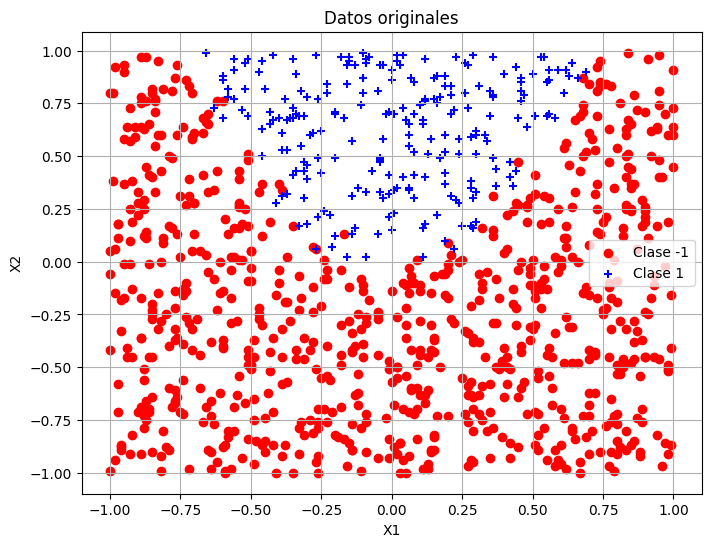

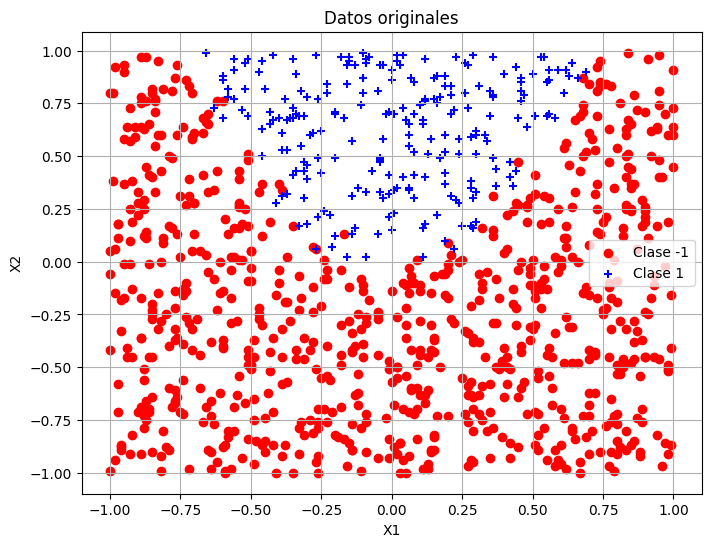

In [12]:
# === Parte A1 ===
# Visualización de los datos
plt.figure(figsize=(8, 6))
for label, marker, color in zip([-1, 1], ['o', '+'], ['red', 'blue']):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                marker=marker, color=color, label=f'Clase {label}')
plt.title('Datos originales')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# === Parte A2 ===
# Crear y entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [14]:
# Mostrar los parámetros del modelo entrenado
print("Coeficientes (w):", modelo.coef_)
print("Intercepción (b):", modelo.intercept_)

Coeficientes (w): [[0.04627947 3.7377654 ]]
Intercepción (b): [-2.1675699]


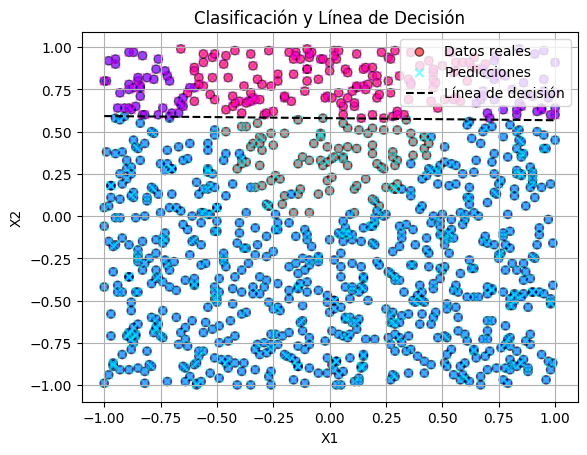

In [15]:
# === Parte A3 ===
# Predecir sobre los mismos datos
y_pred = modelo.predict(X)

# Graficar datos reales
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', label='Datos reales', alpha=0.6, edgecolor='k')

# Graficar predicciones
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='cool', marker='x', label='Predicciones', alpha=0.5)

# Dibujar línea de decisión
coef = modelo.coef_[0]
intercept = modelo.intercept_

# Línea: coef1 * X1 + coef2 * X2 + intercept = 0 → X2 = -(coef1 * X1 + intercept) / coef2
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

plt.plot(x_vals, y_vals.ravel(), 'k--', label='Línea de decisión')

# Estética
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Clasificación y Línea de Decisión')
plt.grid(True)
plt.show()